In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Property type code:
# 1 condos, 2 freehold townhomes, 3 condo townhomes, 5 detached homes, 4 no filter(don't use)

# Pandas DFs
condo_df = pd.read_csv('data/listings_toronto_type1_pages001-162_2024-01-30.csv')
freehold_townhome_df = pd.read_csv('data/listings_toronto_type2_pages001-016_2024-01-30.csv')
condo_townhome_df = pd.read_csv('data/listings_toronto_type3_pages001-015_2024-01-30.csv')
detached_home_df = pd.read_csv('data/listings_toronto_type5_pages001-050_2024-01-30.csv')

In [3]:
# Define the function to drop rows with 0 baths and 0 bedrooms
def drop_zero_baths_and_beds(df):
    # Filter rows where both 'baths' and 'beds' columns are not equal to 0
    df_filtered = df[(df['baths'] != 0) | (df['beds'] != 0)]
    return df_filtered

condo_df = drop_zero_baths_and_beds(condo_df)
freehold_townhome_df = drop_zero_baths_and_beds(freehold_townhome_df)
condo_townhome_df = drop_zero_baths_and_beds(condo_townhome_df)
detached_home_df = drop_zero_baths_and_beds(detached_home_df)

In [4]:
# Combine all data into one DataFrame for overall analysis 
all_properties_df = pd.concat([condo_df, condo_townhome_df, freehold_townhome_df, detached_home_df])
all_properties_df.head()

,url,address,price,baths,beds,dens,street,neighbourhood,mls_id,city,property_type,date_scraped
0,https://toronto.listing.ca/286-main-st-911.E80...,286 Main St 911,619900,1,1,1,Main St,East End-Danforth,E8018446,Toronto,condo_apartment,2024-01-30
1,https://toronto.listing.ca/215-queen-st-606.C7...,215 Queen St 606,529000,1,1,0,Queen St,Waterfront Communities C1,C7266728,Toronto,condo_apartment,2024-01-30
2,https://toronto.listing.ca/10-park-lawn-rd-140...,10 Park Lawn Rd 1408,624900,1,1,1,Park Lawn Rd,Mimico,W7239426,Toronto,condo_apartment,2024-01-30
3,https://toronto.listing.ca/665-queen-st-402.E8...,665 Queen St 402,899900,2,2,0,Queen St,South Riverdale,E8030950,Toronto,condo_apartment,2024-01-30
4,https://toronto.listing.ca/1190-dundas-st-925....,1190 Dundas St 925,599900,1,1,0,Dundas St,South Riverdale,E8030860,Toronto,condo_apartment,2024-01-30


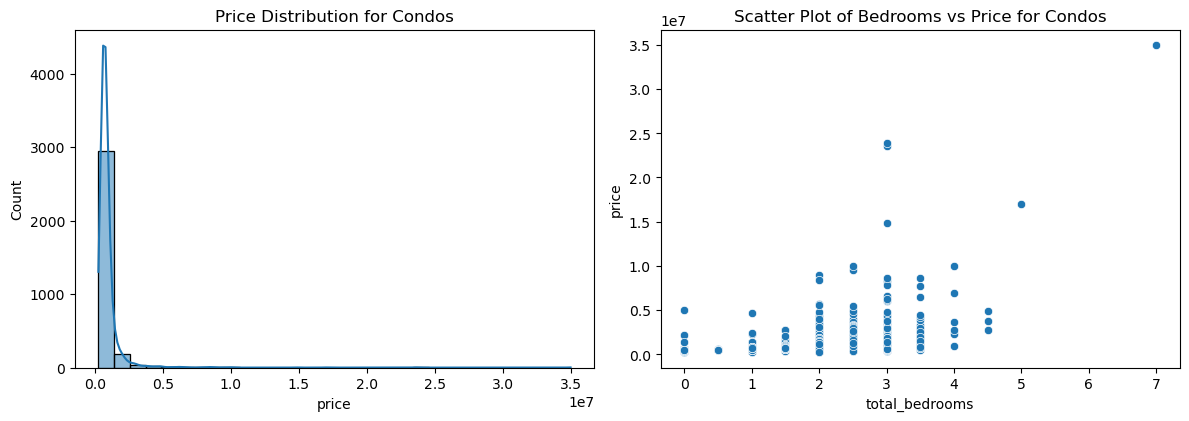

In [5]:
# CONDOS 
# Combine dens as 0.5 to total bedrooms 
condo_df['total_bedrooms'] = condo_df['beds'] + condo_df['dens'].replace('', '0').astype(float) / 2

# Explore distributions for prices, baths, and total bedrooms
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(condo_df['price'], bins=30, kde=True)
plt.title('Price Distribution for Condos')

plt.subplot(2, 2, 2)
sns.scatterplot(data=condo_df, x='total_bedrooms', y='price')
plt.title('Scatter Plot of Bedrooms vs Price for Condos')

plt.tight_layout()
plt.show()

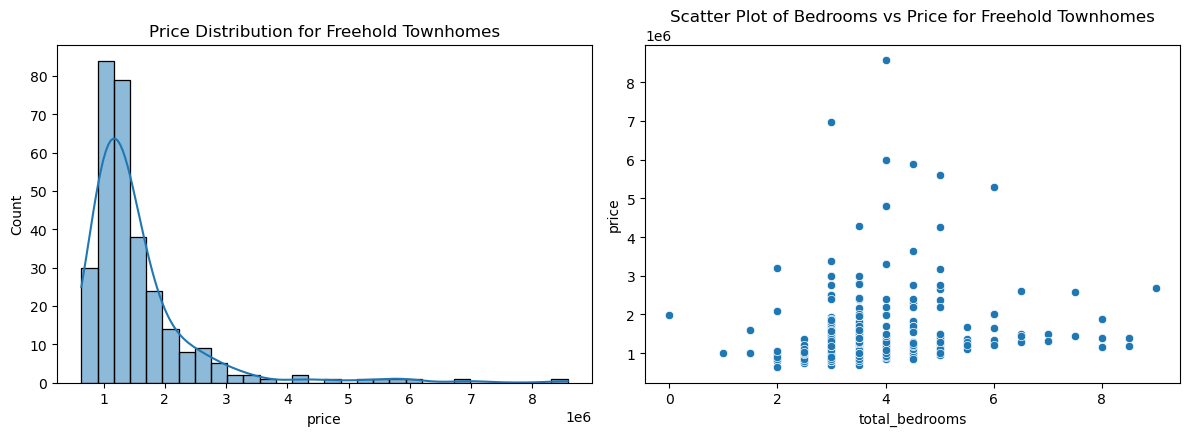

In [6]:
# FREEHOLD TOWNHOME 
# Combine dens as 0.5 to total bedrooms 
freehold_townhome_df['total_bedrooms'] = freehold_townhome_df['beds'] + freehold_townhome_df['dens'].replace('', '0').astype(float) / 2

# Explore distributions for prices, baths, and total bedrooms
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(freehold_townhome_df['price'], bins=30, kde=True)
plt.title('Price Distribution for Freehold Townhomes')

plt.subplot(2, 2, 2)
sns.scatterplot(data=freehold_townhome_df, x='total_bedrooms', y='price')
plt.title('Scatter Plot of Bedrooms vs Price for Freehold Townhomes')

plt.tight_layout()
plt.show()

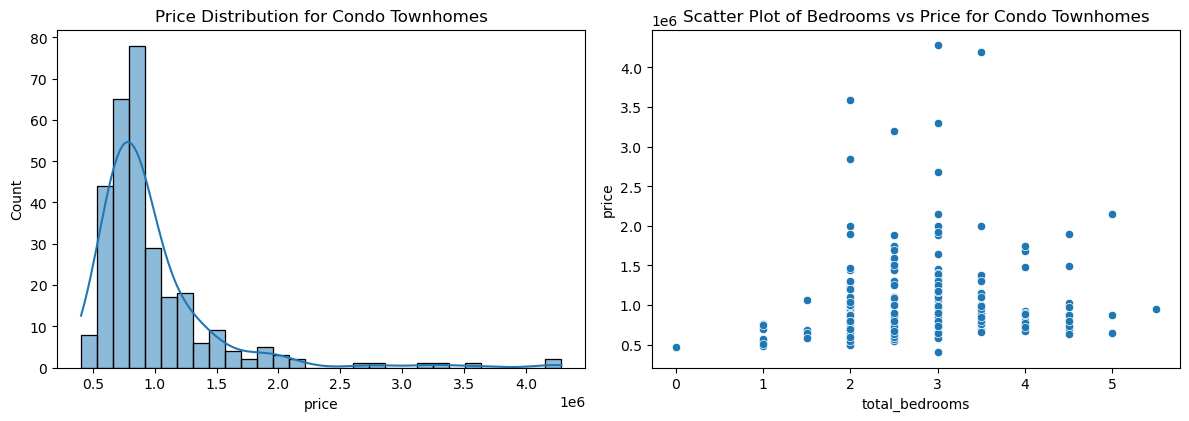

In [7]:
# CONDO TOWNHOME 
# Combine dens as 0.5 to total bedrooms 
condo_townhome_df['total_bedrooms'] = condo_townhome_df['beds'] + condo_townhome_df['dens'].replace('', '0').astype(float) / 2

# Explore distributions for prices, baths, and total bedrooms
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(condo_townhome_df['price'], bins=30, kde=True)
plt.title('Price Distribution for Condo Townhomes')

plt.subplot(2, 2, 2)
sns.scatterplot(data=condo_townhome_df, x='total_bedrooms', y='price')
plt.title('Scatter Plot of Bedrooms vs Price for Condo Townhomes')

plt.tight_layout()
plt.show()

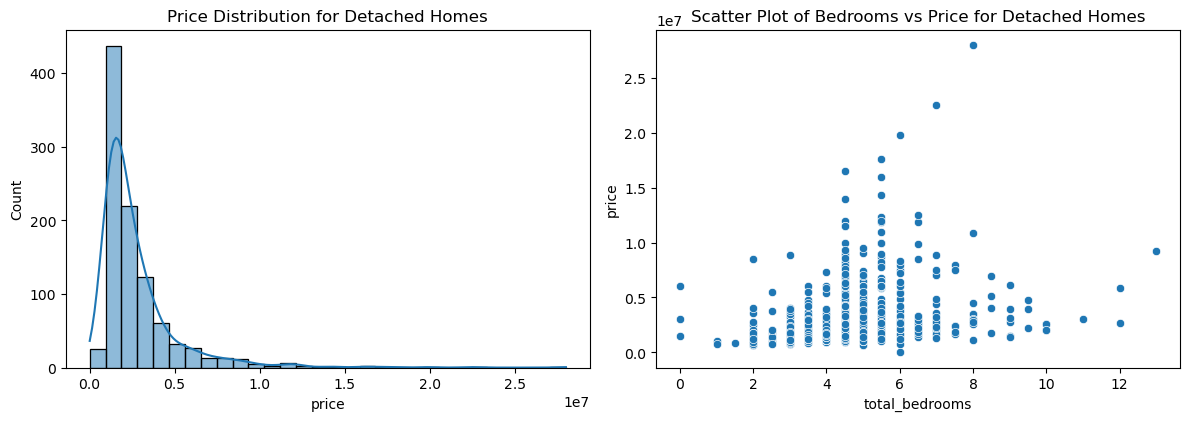

In [8]:
# DETACHED HOME 
# Combine dens as 0.5 to total bedrooms 
detached_home_df['total_bedrooms'] = detached_home_df['beds'] + detached_home_df['dens'].replace('', '0').astype(float) / 2

# Explore distributions for prices, baths, and total bedrooms
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(detached_home_df['price'], bins=30, kde=True)
plt.title('Price Distribution for Detached Homes')

plt.subplot(2, 2, 2)
sns.scatterplot(data=detached_home_df, x='total_bedrooms', y='price')
plt.title('Scatter Plot of Bedrooms vs Price for Detached Homes')

plt.tight_layout()
plt.show()

In [9]:
# Count most common bedrooms, bathrooms, and dens
common_bedrooms = all_properties_df['beds'].mode()[0]
common_bathrooms = all_properties_df['baths'].mode()[0]
common_dens = all_properties_df['dens'].mode()[0]

print(f"Most Common Bedrooms: {common_bedrooms}")
print(f"Most Common Bathrooms: {common_bathrooms}")
print(f"Most Common Dens: {common_dens}")

Most Common Bedrooms: 2
Most Common Bathrooms: 2
Most Common Dens: 0


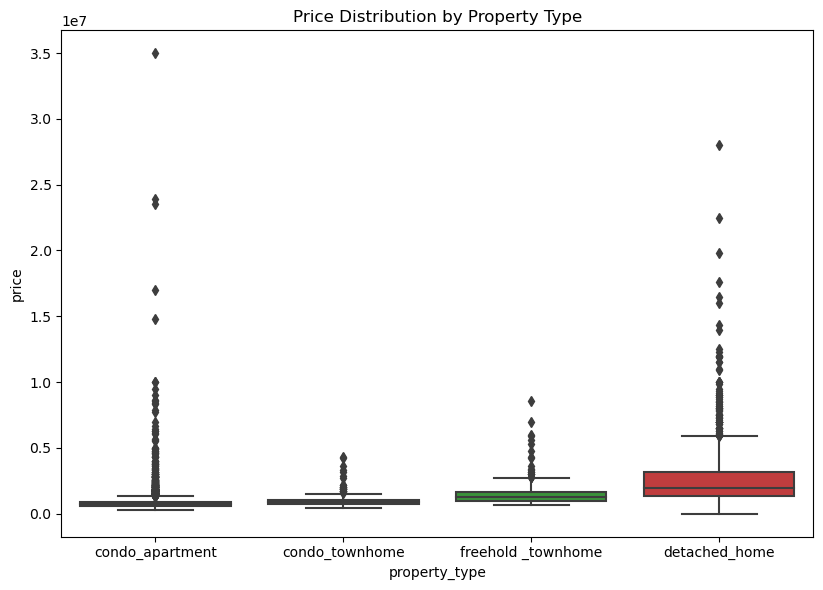

In [10]:
# Price distribution for property types 
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='property_type', y='price', data=all_properties_df)
plt.title('Price Distribution by Property Type')

plt.tight_layout()
plt.show()

In [11]:
# Average property price for each type
average_price_by_type = all_properties_df.groupby('property_type')['price'].mean()

print("Average Property Price by Type:")
print(average_price_by_type)

Average Property Price by Type:
property_type
condo_apartment       9.232462e+05
condo_townhome        9.743048e+05
detached_home         2.750622e+06
freehold _townhome    1.537761e+06
Name: price, dtype: float64


In [12]:
# Function to remove outliers (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each property type
cleaned_df = pd.DataFrame()

for property_type in all_properties_df['property_type'].unique():
    subset_df = all_properties_df[all_properties_df['property_type'] == property_type]
    cleaned_subset = remove_outliers(subset_df, 'price')
    cleaned_df = pd.concat([cleaned_df, cleaned_subset])

# Recalculate average price by type with cleaned data 
cleaned_average_price_by_type = cleaned_df.groupby('property_type')['price'].mean()

print("Cleaned Average Property Price by Type:")
print(cleaned_average_price_by_type)

Cleaned Average Property Price by Type:
property_type
condo_apartment       7.185380e+05
condo_townhome        8.589414e+05
detached_home         2.173080e+06
freehold _townhome    1.335061e+06
Name: price, dtype: float64


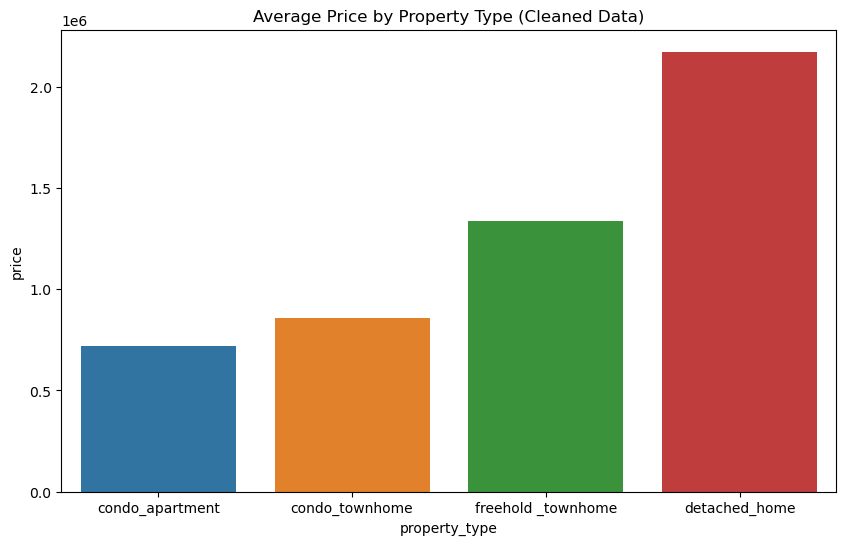

In [13]:
# Average price for each property type
plt.figure(figsize=(10, 6))
sns.barplot(x='property_type', y='price', data=cleaned_df, errorbar=None)
plt.title('Average Price by Property Type (Cleaned Data)')
plt.show()


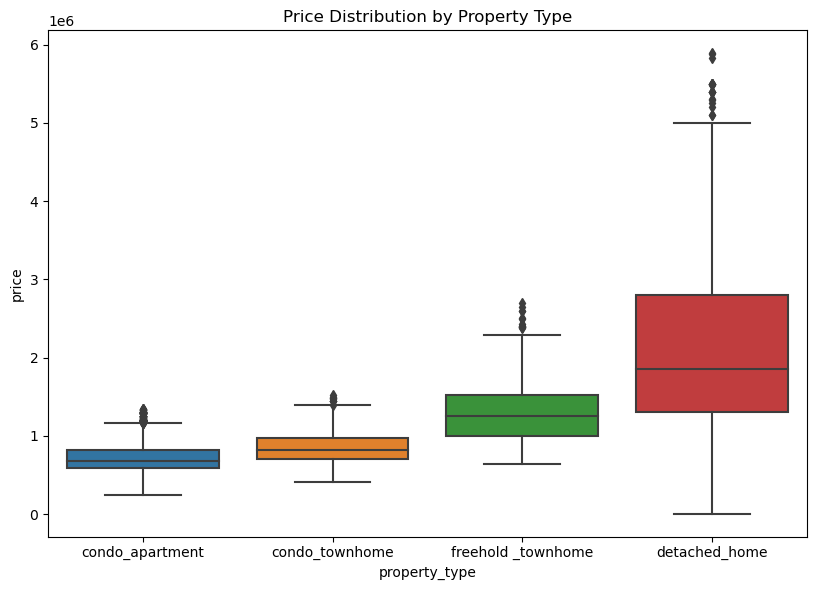

In [14]:
# Plot price distributions for each property type
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='property_type', y='price', data=cleaned_df)
plt.title('Price Distribution by Property Type')

plt.tight_layout()
plt.show()

In [15]:
# Calculate the range of property prices for each property type
price_range_by_type = cleaned_df.groupby('property_type')['price'].agg(lambda x: x.max() - x.min())

print("Range of Property Prices by Type:")
print(price_range_by_type)

Range of Property Prices by Type:
property_type
condo_apartment       1088000
condo_townhome        1114000
detached_home         5881020
freehold _townhome    2060000
Name: price, dtype: int64


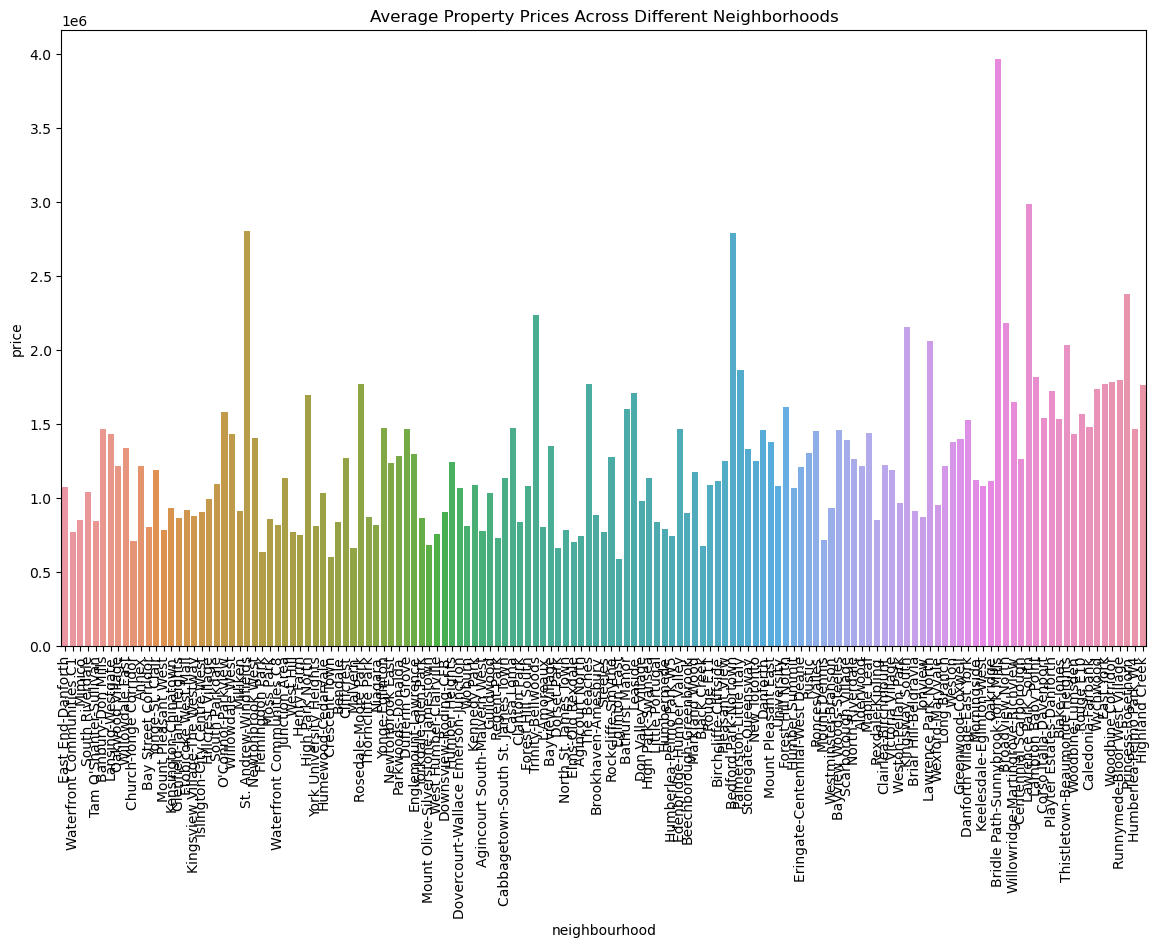

In [16]:
# Plotting a bar chart to visualize average property prices by neighborhood
plt.figure(figsize=(14, 8))
sns.barplot(x='neighbourhood', y='price', data=cleaned_df, errorbar=None)
plt.title('Average Property Prices Across Different Neighborhoods')
plt.xticks(rotation=90)
plt.show()

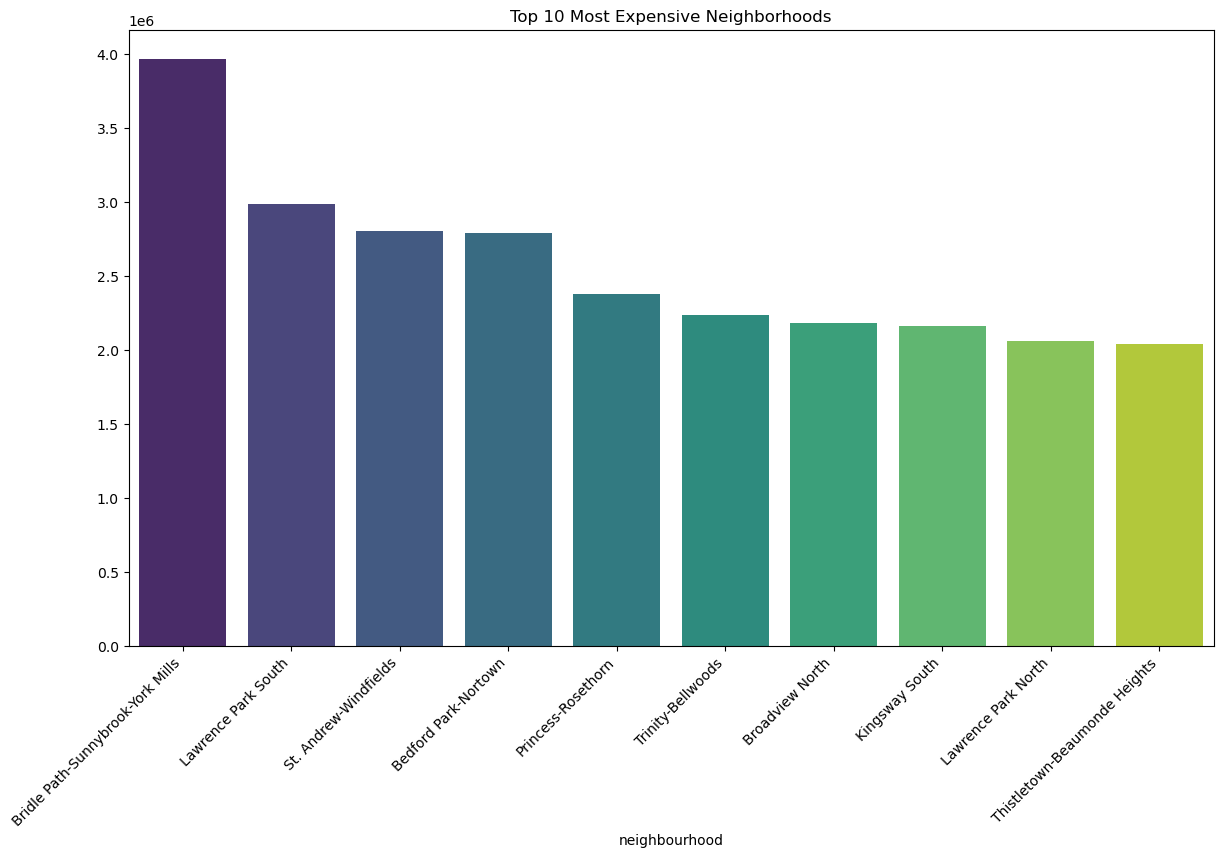

In [17]:
# Calculate average property prices by neighborhood
average_price_by_neighborhood = cleaned_df.groupby('neighbourhood')['price'].mean()

# Sort neighborhoods by average price in descending order
top_expensive_neighborhoods = average_price_by_neighborhood.sort_values(ascending=False).head(10)

# top 10 most expensive neighborhoods
plt.figure(figsize=(14, 8))
sns.barplot(x=top_expensive_neighborhoods.index, y=top_expensive_neighborhoods.values, palette='viridis')
plt.title('Top 10 Most Expensive Neighborhoods')
plt.xticks(rotation=45, ha='right')
plt.show()


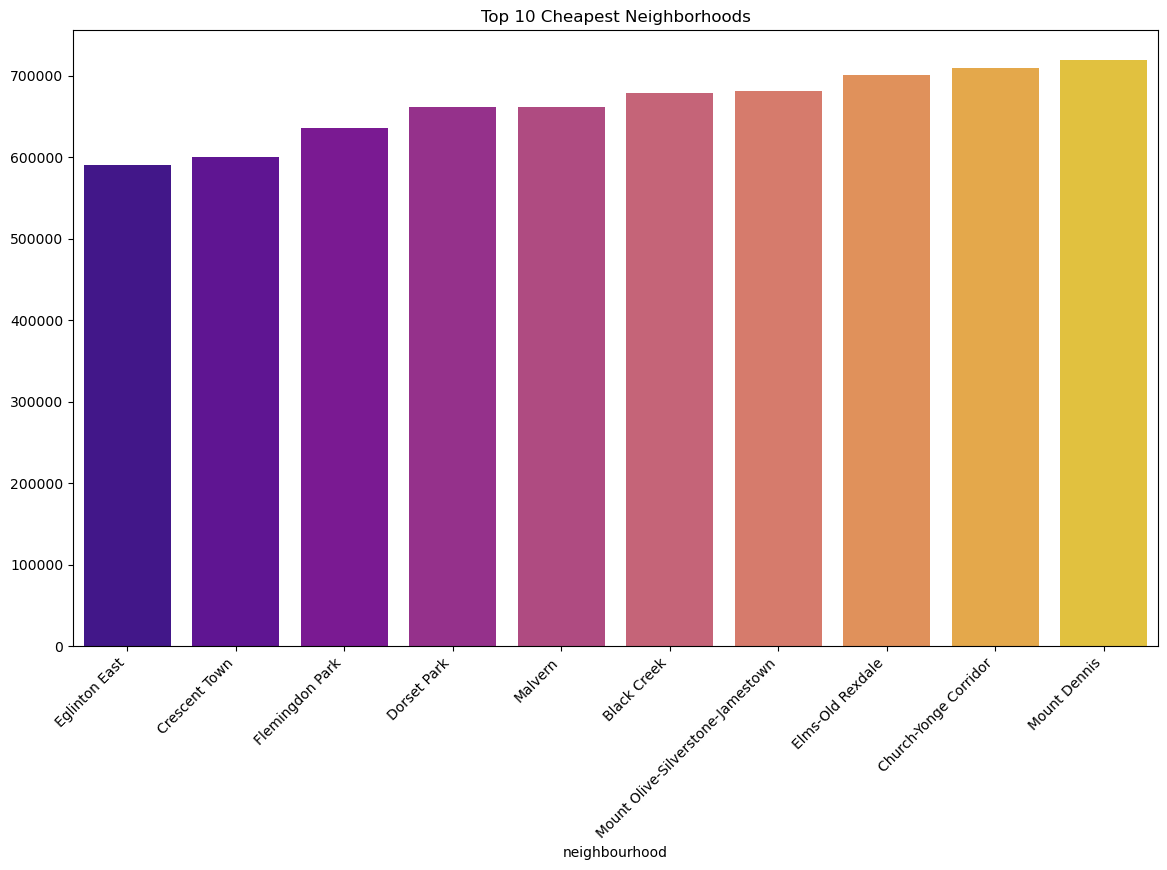

In [18]:
# Sort neighborhoods by average price in ascending order
top_cheapest_neighborhoods = average_price_by_neighborhood.sort_values().head(10)

# top 10 cheapest neighborhoods
plt.figure(figsize=(14, 8))
sns.barplot(x=top_cheapest_neighborhoods.index, y=top_cheapest_neighborhoods.values, palette='plasma')
plt.title('Top 10 Cheapest Neighborhoods')
plt.xticks(rotation=45, ha='right')
plt.show()